In [1]:
#importing all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Importing the data

file1 = pd.read_csv("..\Downloads\Leads.csv")
file1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
# checking the Data Types distribution

file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

From above ,it can be seen above there are around 7 Numeric Column and 30 Categorical Value

In [11]:
# To check the statistic information of the Data

file1.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [13]:
# To check the Dimensions

file1.shape

(9240, 37)

In [17]:
# checking missing values

file1.isnull().sum()

#Result: No Missing Value

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [18]:
#checking null values percentage

round((100*file1.isnull().sum()/file1.shape[0]),2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

### Data understanding and Preparation

In [20]:
# Replacing "Select" value with null values

file1_obj = file1.select_dtypes(include='object')

# Finding columns that have "Select"

c = lambda x: x.str.contains('Select', na=False)
l = file1_obj.columns[file1_obj.apply(c).any()].tolist()
print (l)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [21]:
# All the columns that have a Select Value

select_columns = ['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']

# replace values

file1[select_columns] = file1[select_columns].replace('Select', np.NaN)

In [22]:
#checking null values percentage now

round((100*file1.isnull().sum()/file1.shape[0]),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [23]:
#dropping columns with more than 45% missing values

col=file1.columns

for i in col:
    if((100*(file1[i].isnull().sum()/len(file1.index))) >= 45):
        file1.drop(i, 1, inplace = True)


In [24]:
# checking now

file1.shape

(9240, 30)

In [25]:
# Verifying Data now

round((100*file1.isnull().sum()/file1.shape[0]),2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

#### Observation from above : There are still huge null value in (We will analysis them individually )

1. City 39.71
2. Specialization 36.58
3. Tags 36.29
4. What matters most to you in choosing a course 29.32
5. What is your current occupation 29.11
6. Country 26.63

In [26]:
# 1. City Column

file1.City.value_counts(normalize = True, dropna = False) * 100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

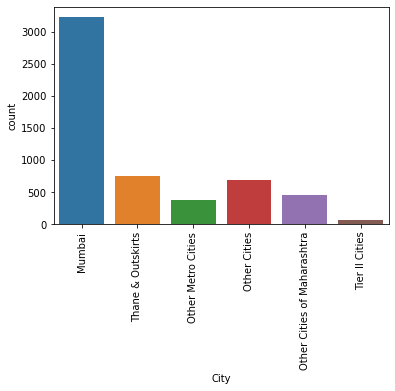

In [27]:
sns.countplot(file1.City)
plt.xticks(rotation = 90)
plt.show()

We will categorize the cities based on logical decisions..

In [28]:
# Imputing Null with 'Others'

file1['City'] = file1['City'].replace(np.nan, 'Others')

# Merge Cities name which are low in numbers to 'Others'

file1['City'] = file1['City'].replace(['Tier II Cities','Other Metro Cities','Other Cities of Maharashtra','Other Cities'], 'Others')

In [29]:
file1['City'].value_counts()

Others               5266
Mumbai               3222
Thane & Outskirts     752
Name: City, dtype: int64

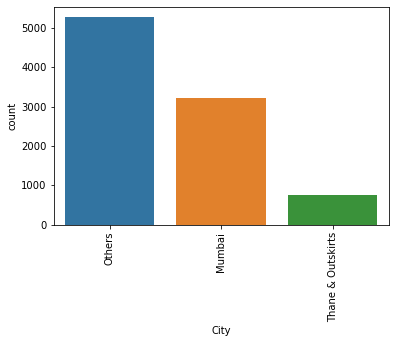

In [30]:
sns.countplot(file1.City)
plt.xticks(rotation = 90)
plt.show()

In [31]:
file1.City.value_counts(normalize = True) * 100

Others               56.991342
Mumbai               34.870130
Thane & Outskirts     8.138528
Name: City, dtype: float64

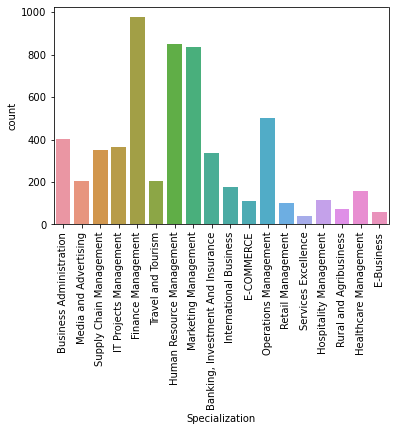

In [32]:
# 2. Specialization Column

sns.countplot(file1.Specialization)
plt.xticks(rotation = 90)
plt.show()

In [33]:
file1.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [34]:
# Imputing Null with 'Others'

file1['Specialization'] = file1['Specialization'].replace(np.nan, 'Others')

# Merge Specialization fieldswhich are low in numbers to 'Others'

file1['Specialization'] = file1['Specialization'].replace(['Rural and Agribusiness','E-Business','Services Excellence'], 'Others')


In [35]:
file1.Specialization.value_counts()

Others                               3550
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Name: Specialization, dtype: int64

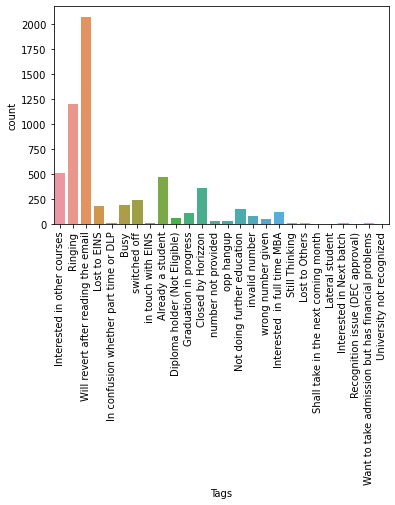

In [36]:
# 3. Tag Column

sns.countplot(file1.Tags)
plt.xticks(rotation = 90)
plt.show()

In [37]:
file1.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [38]:
file1.Tags.value_counts(normalize = True, dropna = False) * 100

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

In [39]:
# Imputing Null with Others

file1['Tags'] = file1['Tags'].replace(np.nan, 'Others')

# Merging "Tag" value  which has low items count to Others - We select value which are below 5%.

file1['Tags'] = file1['Tags'].replace(['Closed by Horizzon','switched off', 'Busy', 'Lost to EINS', 'Not doing further education', 'Interested  in full time MBA',
                                     'Graduation in progress', 'invalid number', 'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup',
                                     'number not provided', 'in touch with EINS', 'Lost to Others', 'Want to take admission but has financial problems',
                                     'Still Thinking', 'Interested in Next batch', 'In confusion whether part time or DLP', 'Lateral student',
                                     'Shall take in the next coming month', 'University not recognized', 'Recognition issue (DEC approval)'                                     ], 'Others')


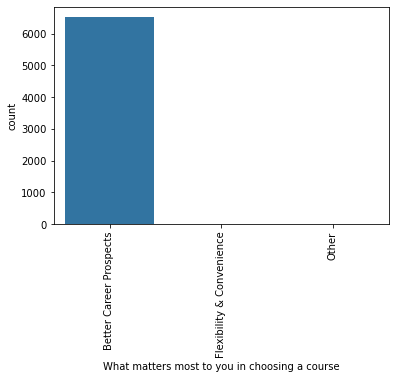

In [40]:
# 4.What matters most to you in choosing a course

sns.countplot(file1['What matters most to you in choosing a course'])
plt.xticks(rotation = 90)
plt.show()

In [41]:
file1['What matters most to you in choosing a course'].value_counts(normalize = True, dropna = False) * 100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

Observation : The combine value of "Better Career Prospects" and NaN is close to 100 % (Highly Skewed). so we will drop this column.

In [42]:
file1.drop('What matters most to you in choosing a course',axis=1, inplace = True)

In [44]:
file1.shape

(9240, 29)

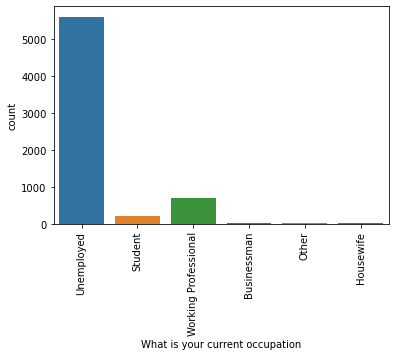

In [45]:
# 5. "What is your current occupation" Column

sns.countplot(file1['What is your current occupation'])
plt.xticks(rotation = 90)
plt.show()

In [46]:
file1['What is your current occupation'].value_counts(normalize = True, dropna = False) * 100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [47]:
# Imputing Null with Others

file1['What is your current occupation'] = file1['What is your current occupation'].replace(np.nan, 'Other')


# Merge "What is your current occupation" value  which has low items count to Others - We select value which are below 5%.

file1['What is your current occupation'] = file1['What is your current occupation'].replace(['Student','Student and Others','Housewife','Businessman'], 'Other')

In [48]:
file1['What is your current occupation'].value_counts()

Unemployed              5600
Other                   2934
Working Professional     706
Name: What is your current occupation, dtype: int64

In [49]:
file1['What is your current occupation'].value_counts(normalize = True) * 100

Unemployed              60.606061
Other                   31.753247
Working Professional     7.640693
Name: What is your current occupation, dtype: float64

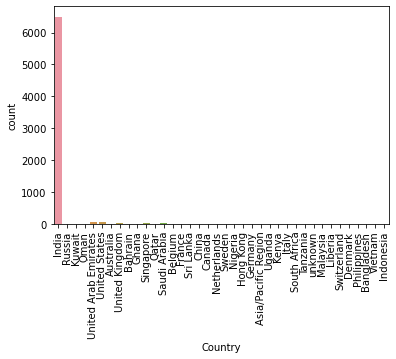

In [50]:
# 6. Country Column

sns.countplot(file1['Country'])
plt.xticks(rotation = 90)
plt.show()

In [51]:
file1.Country.value_counts(normalize = True, dropna = False) * 100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

Observation : The combined value of "India" and NaN is close to 97% (Highly Skewed). so we will drop this column.

In [53]:
file1.drop('Country', axis = 1, inplace = True)

In [54]:
#Verifying Data

round((100*file1.isnull().sum()/file1.shape[0]),2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Last Activity                               1.11
Lead Source                                 0.39
Prospect ID                                 0.00
X Education Forums                          0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
City                                        0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Tags                                        0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
Magazine                                    0.00
Newspaper Article                           0.00
Lead Number                                 0.00
Search                                      0.00
What is your current

In [55]:
# 7. 'TotalVisits' Column

file1['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [56]:
file1['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [57]:
file1['TotalVisits'].fillna(file1['TotalVisits'].median(), inplace=True)

file1['TotalVisits'] = file1['TotalVisits'].astype('int')

In [58]:
# 8. 'Page Views Per Visit' Column

file1['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [59]:
file1['Page Views Per Visit'].fillna(file1['Page Views Per Visit'].median(), inplace=True)

In [60]:
round((100*file1.isnull().sum()/file1.shape[0]),2).sort_values(ascending=False)

Last Activity                               1.11
Lead Source                                 0.39
Prospect ID                                 0.00
Newspaper Article                           0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
City                                        0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Tags                                        0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Magazine                                    0.00
Lead Number                                 0.00
Search                                      0.00
What is your current occupation             0.00
Specialization                              0.00
Page Views Per Visit

In [61]:
# 9. 'Last Activity' Column

file1['Last Activity'].value_counts(normalize = True) * 100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

In [62]:
# Imputing Null with Others

file1['Last Activity'] = file1['Last Activity'].replace(np.nan, 'Others')

# Merge low frequency field to Others - Below 2 %

file1['Last Activity'] = file1['Last Activity'].replace(['Form Submitted on Website','Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                   'View in browser link Clicked','Email Received','Email Marked Spam','Resubscribed to emails',
                                                  'Visited Booth in Tradeshow'], 'Others')

In [63]:
file1['Last Activity'].value_counts(normalize = True) * 100

Email Opened               37.196970
SMS Sent                   29.707792
Olark Chat Conversation    10.530303
Page Visited on Website     6.926407
Converted to Lead           4.632035
Others                      4.588745
Email Bounced               3.528139
Email Link Clicked          2.889610
Name: Last Activity, dtype: float64

In [64]:
# 'Lead Source' Column

file1['Lead Source'].value_counts(normalize = True) * 100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

In [65]:
# Imputing Null with Others

file1['Lead Source'] = file1['Lead Source'].replace(np.nan, 'Others')

# Merge low frequency field to Others

file1['Lead Source'] = file1['Lead Source'].replace(['Facebook','bing','google','Click2call','Press_Release','Social Media','Live Chat','welearnblog_Home','Pay per Click Ads','NC_EDM','youtubechannel','testone','blog','WeLearn'], 'Others')

In [66]:
file1['Lead Source'].value_counts(normalize = True) * 100

Google              31.038961
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Others               1.287879
Name: Lead Source, dtype: float64

In [67]:
# merge google with Google

file1['Lead Source'] = file1['Lead Source'].replace('google', 'Google')

### Final Checking for Null Value

In [68]:
# Null Value Check

round((100*file1.isnull().sum()/file1.shape[0]),2).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website             

### Verify data distribution in categorical columns

In [71]:

file1_Column_Category = file1.loc[:, file1.dtypes == 'object']
for i in file1_Column_Category:
    print(file1[i].astype('category').value_counts())
    print('___________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
___________________________________________
Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others               119
Name: Lead S

Observation : Drop Column Due to
There is a high degree of skew in the columns below:

1. Do Not Call, Do Not Email , Search ,Newspaper Article ,X Education Forums ,Newspaper, Digital Advertisement,Through Recommendations

2. Single Category in column :

Magazine , 'Receive More Updates About Our Courses' , 'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'

In [72]:
#Before Drop Value

file1.shape

(9240, 28)

In [74]:
droping_Col = ['Do Not Call', 'Do Not Email', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 
                'Through Recommendations', 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                'Get updates on DM Content', 'I agree to pay the amount through cheque']
file1.drop(droping_Col, axis=1, inplace=True)

In [75]:
#After Drop Value

file1.shape

(9240, 15)

In [76]:
file1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Others,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5,674,2.5,Email Opened,Others,Unemployed,Ringing,Others,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2,1532,2.0,Email Opened,Business Administration,Other,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [77]:
## Dropping 'Prospect ID' (Unique ID) and 'Lead Number' is Numerical Id which is of no use 

file1.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [78]:
file1.shape

(9240, 13)

### Performing EDA - Exploratory Data Analysis

In [80]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   int32  
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9240 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   What is your current occupation         9240 non-null   object 
 9   Tags                                    9240 non-null   object 
 10  City                                    9240 non-null   obje

In [81]:
# Copy of Original Data frame

leads_file1 = file1

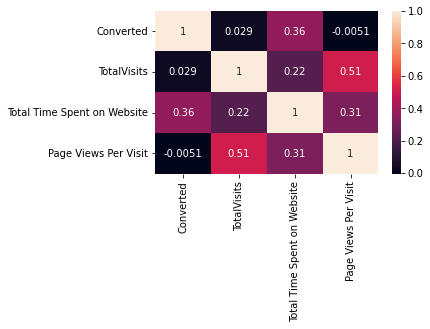

In [88]:
# visualizing correlation by heatmap

plt.figure(figsize=(5, 3))
sns.heatmap(leads_file1.corr(),annot=True)
plt.show()

Observation: 
    
1. Total Visits and Page Views Per Visits have a strong association.
2. Converted has good correlation with Total time spent on Website

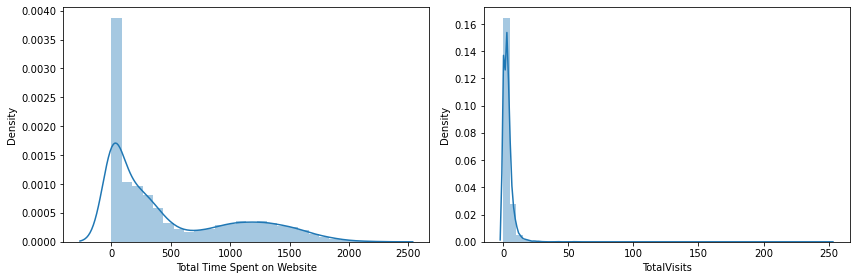

In [89]:
# Plotting Histogram

def plot_bars():
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    sns.distplot(leads_file1['Total Time Spent on Website'])

    plt.subplot(122)
    sns.distplot(leads_file1['TotalVisits'])

    plt.tight_layout()
    plt.show()
    
plot_bars()

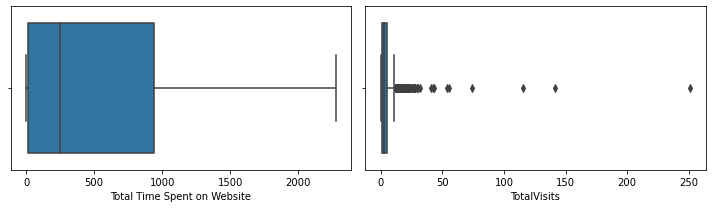

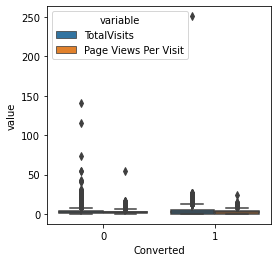

In [92]:
# Boxplots before outlier removal

num_file1 =  leads_file1[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit','Converted']]


def plot_boxes():
    plt.figure(figsize=(10, 3))
    plt.subplot(121)
    sns.boxplot(data=leads_file1, x='Total Time Spent on Website')

    plt.subplot(122)
    sns.boxplot(data=leads_file1, x='TotalVisits')

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(4, 4))
    box_long = pd.melt(num_file1.drop('Total Time Spent on Website', axis=1), id_vars='Converted')
    sns.boxplot(x='Converted', y='value', hue='variable', data=box_long)
    plt.show()
    
plot_boxes()

Observations: 
    
There are upper limit outliers in both the total visits and page views per visit columns, as shown in both the box plots.

In [93]:
# Removing outliers

out_file1 = num_file1.drop('Converted', axis=1)
q = out_file1.quantile(0.97)
out_file1 = out_file1[out_file1 < q]
out_file1 = out_file1.dropna()

leads_file1 = leads_file1.loc[out_file1.index].reset_index(drop=True)
num_file1 = num_file1.loc[out_file1.index].reset_index(drop=True)

print("After outliers were removed, "+f"{round(len(leads_file1)/9239*100,2)}% the data was retained.")

After outliers were removed, 90.51% the data was retained.


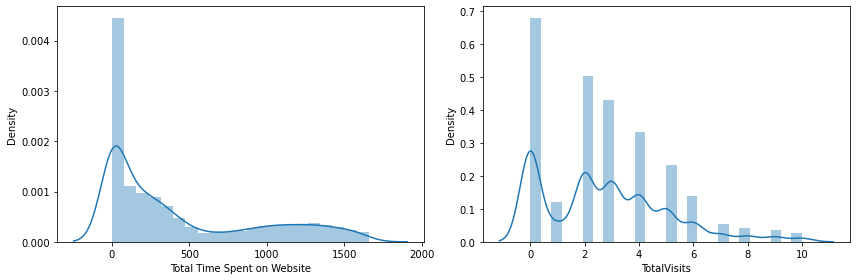

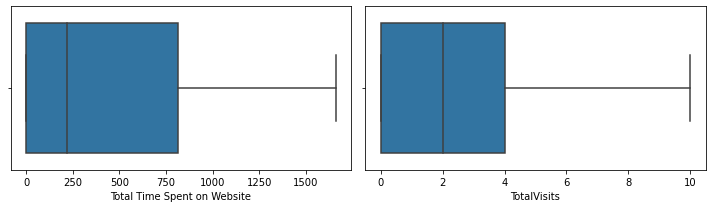

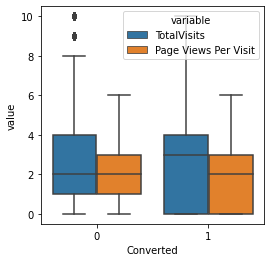

In [94]:
# After Outlier removal

plot_bars()
plot_boxes()

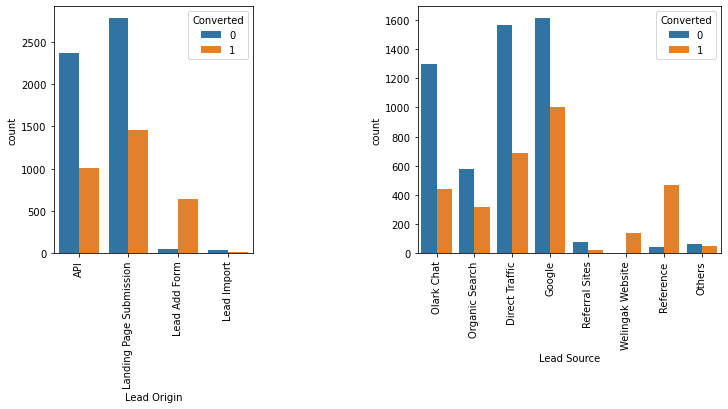

In [96]:
# Plotting bar Graph

plt.figure(figsize=(25, 10))

# Lead Origin 
plt.subplot(2,6,1)
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads_file1)
plt.xticks(rotation = 90)

# Lead Source
plt.subplot(2,4,2)
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_file1)
plt.xticks(rotation = 90)


plt.show()

#### Observations: 
    
1.Lead Origin Graph
a.API and Landing Page Submission have around 40-50% conversion rate
b.Lead Add Form has more than 90% conversion rate but count of lead are not very high.
c.Lead Import are very less in count.

2. Lead Source Graph
a.Google and Direct traffic generate high number of leads.
b.Refrences and wellingak website has high conversion rate. Should be more focused on.

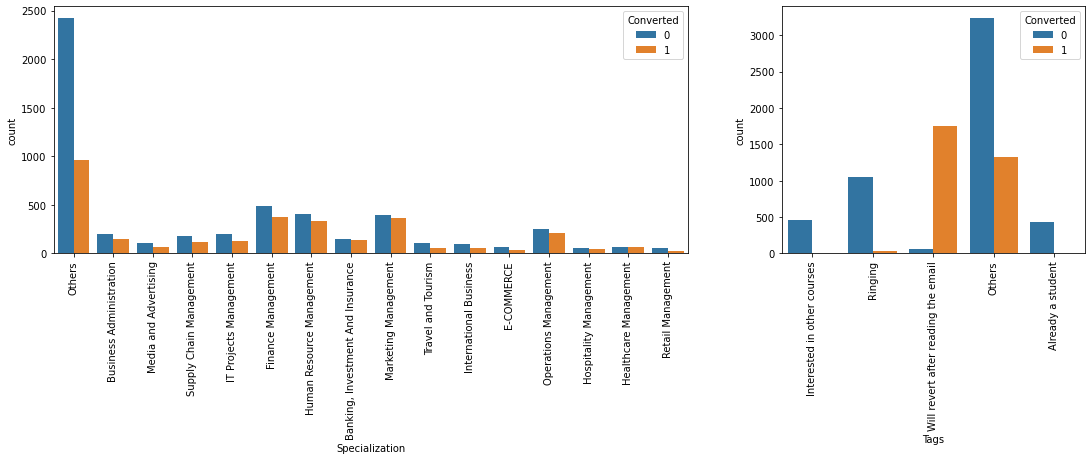

In [97]:

plt.figure(figsize=(25, 10))

# Specialization
plt.subplot(2,2,1)
sns.countplot(x = "Specialization", hue = "Converted", data = leads_file1)
plt.xticks(rotation = 90)

# Tags
plt.subplot(2,4,3)
sns.countplot(x = "Tags", hue = "Converted", data = leads_file1)
plt.xticks(rotation = 90)


plt.show()

Observations:
    
1. Specialization Graph
    a. The emphasis should be on diverse specialities with low lead generation but high conversion rates.
    b. The conversion rate from other sources is below average.

2. Tag Graph
    a.The conversion rate is high for revert after reading mail .Which is justify.

### Modelling

In [99]:
leads_file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8362 entries, 0 to 8361
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8362 non-null   object 
 1   Lead Source                             8362 non-null   object 
 2   Converted                               8362 non-null   int64  
 3   TotalVisits                             8362 non-null   int32  
 4   Total Time Spent on Website             8362 non-null   int64  
 5   Page Views Per Visit                    8362 non-null   float64
 6   Last Activity                           8362 non-null   object 
 7   Specialization                          8362 non-null   object 
 8   What is your current occupation         8362 non-null   object 
 9   Tags                                    8362 non-null   object 
 10  City                                    8362 non-null   obje

In [100]:
leads_file1.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Others,No,Modified
1,API,Organic Search,0,5,674,2.5,Email Opened,Others,Unemployed,Ringing,Others,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2,1532,2.0,Email Opened,Business Administration,Other,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [101]:
# finding Unique Value

# determine unique values

for k, v in leads_file1.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

Lead Origin = 4
Lead Source = 8
Last Activity = 8
Specialization = 16
What is your current occupation = 3
Tags = 5
City = 3
A free copy of Mastering The Interview = 2
Last Notable Activity = 16


#### Creating dummy variable

In [102]:
# Dummy Creation 

leads_file1['A free copy of Mastering The Interview'] = leads_file1['A free copy of Mastering The Interview'].map({'No':0,'Yes':1})
leads_file1['A free copy of Mastering The Interview'].value_counts()

0    5918
1    2444
Name: A free copy of Mastering The Interview, dtype: int64

In [103]:
leads_file1.shape

(8362, 13)

In [104]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

leads_file1 = pd.get_dummies(leads_file1, drop_first=True)
leads_file1.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,5,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,305,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2,1428,1.0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [105]:
leads_file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8362 entries, 0 to 8361
Data columns (total 60 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             8362 non-null   int64  
 1   TotalVisits                                           8362 non-null   int32  
 2   Total Time Spent on Website                           8362 non-null   int64  
 3   Page Views Per Visit                                  8362 non-null   float64
 4   A free copy of Mastering The Interview                8362 non-null   int64  
 5   Lead Origin_Landing Page Submission                   8362 non-null   uint8  
 6   Lead Origin_Lead Add Form                             8362 non-null   uint8  
 7   Lead Origin_Lead Import                               8362 non-null   uint8  
 8   Lead Source_Google                                    8362

### Train-Test Split

In [106]:
# importing libraries

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [107]:
# Putting feature variable to X

X = leads_file1.drop(['Converted'], 1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,5,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,1532,2.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,305,1.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2,1428,1.0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [108]:
# Put the target variable in y

y = leads_file1['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [109]:
# Split Dataset to 70-30

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

In [110]:
# Import Library  and scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1262,0.2,0.001206,0.333333,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
800,0.4,0.007233,0.666667,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
221,0.1,0.738999,0.166667,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6454,0.3,0.963834,0.250000,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
8200,0.6,0.214587,0.333333,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Model Building

In [111]:
# Import Lib  'LogisticRegression'

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [112]:
# Import RFE and Use 12 

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 12)     
rfe = rfe.fit(X_train, y_train)


In [113]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 7),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 40),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 18),
 ('Lead Source_Google', False, 26),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Others', False, 31),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 39),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 9),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', False, 20),
 ('Last Activity_Others', False, 13),
 ('Last Activity_Page Visited on Website', False, 30),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 37),
 ('Specialization_E-COMMERCE', False, 35),
 (

In [114]:
X_train_12_col = X_train.columns[rfe.support_]
X_train_12 = X_train[X_train_12_col]
X_train_12

,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email
1262,0.001206,0.333333,0,0,0,0,1,1,0,1,0,0
800,0.007233,0.666667,0,0,0,0,0,0,0,1,0,0
221,0.738999,0.166667,0,0,0,0,0,1,0,1,0,0
6454,0.963834,0.250000,0,0,0,0,0,1,0,0,1,0
8200,0.214587,0.333333,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
350,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0
79,0.606992,0.333333,1,0,0,0,0,1,0,1,0,0
8039,0.807715,0.333333,0,0,0,0,0,1,0,0,0,0
6936,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0


In [115]:
# Adding a constant Variable

X_train_s = sm.add_constant(X_train_12)
X_train_s

,const,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email
1262,1.0,0.001206,0.333333,0,0,0,0,1,1,0,1,0,0
800,1.0,0.007233,0.666667,0,0,0,0,0,0,0,1,0,0
221,1.0,0.738999,0.166667,0,0,0,0,0,1,0,1,0,0
6454,1.0,0.963834,0.250000,0,0,0,0,0,1,0,0,1,0
8200,1.0,0.214587,0.333333,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,1.0,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0
79,1.0,0.606992,0.333333,1,0,0,0,0,1,0,1,0,0
8039,1.0,0.807715,0.333333,0,0,0,0,0,1,0,0,0,0
6936,1.0,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0


In [116]:
#Logististic reg . Create a first fitted model

logm = sm.GLM(y_train, X_train_s, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5853
Model:                            GLM   Df Residuals:                     5840
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1489.7
Date:                Tue, 09 Aug 2022   Deviance:                       2979.4
Time:                        14:23:17   Pearson chi2:                 7.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.4084      0.339    -18.888      0.000      -7.073      -5.743
Total Time Spent on Website                              3.4705      0.171     20.321      0.000       3.136       3.805
Page Views Per Visit                                    -2.2135      0.213    -10.394      0.000      -2.631      -1.796
Lead Origin_Lead Add Form                                2.3522      0.252      9.333      0.000       1.858       2.846
Lead Source_Welingak Website                             2.3599      1.051      2.244      0.025       0.299       4.421
Last Activity_Email Bounced                             -1.5019      0.397     -3.779      0.000      -2.281      -0.723
Last Activity_Email Opened                               0.9682      0.122      7.909      0.000       0.728       1.208
Last Activity_SMS Sent                                   2.0963      0.131     15.998      0.000       1.839       2.353
What is your current occupation_Unemployed               1.4375      0.104     13.816      0.000       1.234       1.641
What is your current occupation_Working Professional     2.3262      0.280      8.303      0.000       1.777       2.875
Tags_Others                                              3.3331      0.311     10.726      0.000       2.724       3.942
Tags_Ringing                                            -0.4731      0.386     -1.225      0.221      -1.230       0.284
Tags_Will revert after reading the email                 6.7543      0.348     19.400      0.000       6.072       7.437
========================================================================================================================
"""

In [117]:
#Checking  VIF

vif = pd.DataFrame()
vif['Features'] = X_train_12.columns
vif['VIF'] = [variance_inflation_factor(X_train_12.values, i) for i in range(X_train_12.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Page Views Per Visit,3.25
7,What is your current occupation_Unemployed,3.04
11,Tags_Will revert after reading the email,2.88
9,Tags_Others,2.65
6,Last Activity_SMS Sent,2.28
0,Total Time Spent on Website,2.25
5,Last Activity_Email Opened,2.22
10,Tags_Ringing,1.85
2,Lead Origin_Lead Add Form,1.65
8,What is your current occupation_Working Profes...,1.60


In [118]:
# Drop Tags_Ringing with high P Value

X_train_11 = X_train_12.drop(["Tags_Ringing"],axis=1)

In [119]:
# Refit the model 

logm_1 = sm.GLM(y_train,(sm.add_constant(X_train_11)), family = sm.families.Binomial())
res2 = logm_1.fit()

res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5853
Model:                            GLM   Df Residuals:                     5841
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1490.4
Date:                Tue, 09 Aug 2022   Deviance:                       2980.9
Time:                        14:24:09   Pearson chi2:                 7.32e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.7107      0.252    -26.590      0.000      -7.205      -6.216
Total Time Spent on Website                              3.4684      0.171     20.317      0.000       3.134       3.803
Page Views Per Visit                                    -2.2168      0.213    -10.419      0.000      -2.634      -1.800
Lead Origin_Lead Add Form                                2.3310      0.250      9.320      0.000       1.841       2.821
Lead Source_Welingak Website                             2.3793      1.051      2.264      0.024       0.320       4.439
Last Activity_Email Bounced                             -1.5017      0.397     -3.780      0.000      -2.280      -0.723
Last Activity_Email Opened                               0.9660      0.123      7.885      0.000       0.726       1.206
Last Activity_SMS Sent                                   2.0801      0.130     15.966      0.000       1.825       2.335
What is your current occupation_Unemployed               1.4354      0.104     13.805      0.000       1.232       1.639
What is your current occupation_Working Professional     2.3400      0.281      8.314      0.000       1.788       2.892
Tags_Others                                              3.6450      0.201     18.096      0.000       3.250       4.040
Tags_Will revert after reading the email                 7.0637      0.258     27.431      0.000       6.559       7.568
========================================================================================================================
"""

In [120]:
#Checking  VIF

vif = pd.DataFrame()
vif['Features'] = X_train_11.columns
vif['VIF'] = [variance_inflation_factor(X_train_11.values, i) for i in range(X_train_11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Page Views Per Visit,3.09
7,What is your current occupation_Unemployed,2.60
10,Tags_Will revert after reading the email,2.26
0,Total Time Spent on Website,2.25
6,Last Activity_SMS Sent,2.13
5,Last Activity_Email Opened,2.09
9,Tags_Others,2.05
2,Lead Origin_Lead Add Form,1.65
8,What is your current occupation_Working Profes...,1.57
3,Lead Source_Welingak Website,1.28


Observation :
    
    The P-Value seems good for all variable. So we will use this feature as final set

### Model Evaluation

In [121]:
# Probablity Predicton

y_train_prediction = res2.predict(sm.add_constant(X_train_11))
y_train_prediction[:10]

1262    0.429261
800     0.010788
221     0.637245
6454    0.076814
8200    0.109646
1731    0.099765
4270    0.225873
1165    0.183066
3355    0.050729
271     0.049263
dtype: float64

In [122]:
# Reshape

y_train_prediction = y_train_prediction.values.reshape(-1)
y_train_prediction[:10]

array([0.42926141, 0.0107882 , 0.63724508, 0.07681377, 0.10964614,
       0.09976493, 0.22587267, 0.18306573, 0.05072894, 0.04926307])

In [124]:
y_train_prediction_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_prediction})
y_train_prediction_final.head()

,Converted,Conversion_Prob
0,0,0.429261
1,0,0.010788
2,0,0.637245
3,0,0.076814
4,1,0.109646


In [125]:
y_train_prediction_final['Predicted'] = y_train_prediction_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_prediction_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.429261,0
1,0,0.010788,0
2,0,0.637245,1
3,0,0.076814,0
4,1,0.109646,0


In [126]:
# Import sklearn evaluation 

from sklearn import metrics

In [127]:
#checking Accuracy

print(metrics.accuracy_score(y_train_prediction_final.Converted, y_train_prediction_final.Predicted))

0.8962924995728686


### Plotting ROC

In [128]:


def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

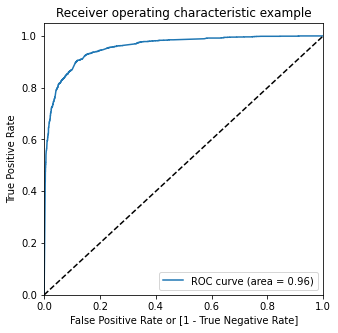

In [130]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_prediction_final.Converted, y_train_prediction_final.Conversion_Prob, drop_intermediate = False )
draw_roc(y_train_prediction_final.Converted, y_train_prediction_final.Conversion_Prob)

The ROC is 0.96 which is Good.

In [131]:
# Column with  Probablity Cutoff

numbers123 = [float(x)/10 for x in range(10)]
for i in numbers123:
    y_train_prediction_final[i]= y_train_prediction_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_prediction_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.429261,0,1,1,1,1,1,0,0,0,0,0
1,0,0.010788,0,1,0,0,0,0,0,0,0,0,0
2,0,0.637245,1,1,1,1,1,1,1,1,0,0,0
3,0,0.076814,0,1,0,0,0,0,0,0,0,0,0
4,1,0.109646,0,1,1,0,0,0,0,0,0,0,0


In [132]:

cutoff_file1 = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num1 = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num1:
    cm1 = metrics.confusion_matrix(y_train_prediction_final.Converted, y_train_prediction_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_file1.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_file1)

     prob  accuracy     sensi     speci
0.0   0.0  0.377926  1.000000  0.000000
0.1   0.1  0.780796  0.974684  0.663005
0.2   0.2  0.861780  0.939421  0.814611
0.3   0.3  0.889288  0.905967  0.879154
0.4   0.4  0.891850  0.853978  0.914859
0.5   0.5  0.896292  0.828210  0.937654
0.6   0.6  0.893901  0.790687  0.956605
0.7   0.7  0.878866  0.728300  0.970338
0.8   0.8  0.866222  0.681284  0.978577
0.9   0.9  0.842303  0.602622  0.987915


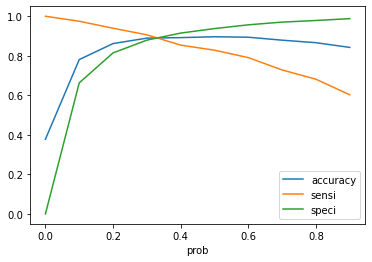

In [133]:
# Cut Off Plot 

cutoff_file1.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

1. The 0.34 is out cutoff

2. Accuracy dosent change after 0.3

In [134]:
y_train_prediction_final['final_predicted'] = y_train_prediction_final.Conversion_Prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_prediction_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.429261,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.010788,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.637245,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.076814,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.109646,0,1,1,0,0,0,0,0,0,0,0,0


In [136]:
#Accuracy Check

Accuracy1 = metrics.accuracy_score(y_train_prediction_final.Converted, y_train_prediction_final.final_predicted)
print('Accuracy = ' + str(Accuracy1))

Accuracy = 0.8884332820775671


In [137]:
#confusion matrix

confusion = metrics.confusion_matrix(y_train_prediction_final.Converted, y_train_prediction_final.final_predicted )
confusion

array([[3278,  363],
       [ 290, 1922]], dtype=int64)

In [138]:
# Substituting the value of true positive
TP = confusion[1,1]

# Substituting the value of true negatives
TN = confusion[0,0]

# Substituting the value of false positives
FP = confusion[0,1] 

# Substituting the value of false negatives
FN = confusion[1,0]

In [139]:
print('Accuracy = ' + str(Accuracy1))

# sensitivity
sensitivity = TP/(TP+FN)
print('sensitivity = ' + str(sensitivity))


#specificity
specificity = TN/(TN+FP)
print('specificity = ' + str(specificity))

Accuracy = 0.8884332820775671
sensitivity = 0.8688969258589512
specificity = 0.9003021148036254


Observation:
    As a result, 
    Accuracy (0.888)
    Sensitivity ( 0.8688969258589512 ) 
    Specificity ( 0.9003021148036254) 
    
    are good since the Cutoff point is good.

### Test Set

In [140]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [141]:
col = X_train_11.columns 

# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Others,Tags_Will revert after reading the email
7000,1.0,0.428571,0.500000,0,0,0,0,1,1,0,1,0
2633,1.0,0.164557,0.333333,0,0,0,0,0,1,0,1,0
1135,1.0,0.110910,0.250000,0,0,0,1,0,0,0,0,0
3919,1.0,0.867993,0.333333,0,0,0,0,1,1,0,0,0
2794,1.0,0.215793,0.333333,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1923,1.0,0.261001,0.333333,0,0,0,1,0,0,0,1,0
7630,1.0,0.115732,1.000000,0,0,0,0,1,1,0,1,0
7590,1.0,0.076552,0.166667,0,0,0,0,0,1,0,0,0
2062,1.0,0.716697,1.000000,0,0,0,1,0,1,0,0,0


In [142]:

y_test_prediction = res2.predict(X_test_sm)

# Converting to df
y_prediction_file1 = pd.DataFrame(y_test_prediction)

# Converting y_test to df
y_test_file1 = pd.DataFrame(y_test)

In [143]:
# Remove index and Append for both dataframes 

y_prediction_file1.reset_index(drop=True, inplace=True)
y_test_file1.reset_index(drop=True, inplace=True)

In [144]:

y_prediction_final = pd.concat([y_test_file1, y_prediction_file1],axis=1)
y_prediction_final.head()

,Converted,0
0,0,0.695921
1,1,0.142042
2,0,0.002694
3,0,0.284254
4,0,0.044952


In [145]:
# Renaming column 

y_prediction_final= y_prediction_final.rename(columns = {0 : 'Conversion_Prob'})
y_prediction_final.head()

,Converted,Conversion_Prob
0,0,0.695921
1,1,0.142042
2,0,0.002694
3,0,0.284254
4,0,0.044952


In [146]:
#Using cut off 0.34 for Prediction

y_prediction_final['final_predicted'] = y_prediction_final.Conversion_Prob.map(lambda x: 1 if x > 0.34 else 0)
y_prediction_final

,Converted,Conversion_Prob,final_predicted
0,0,0.695921,1
1,1,0.142042,0
2,0,0.002694,0
3,0,0.284254,0
4,0,0.044952,0
...,...,...,...
2504,0,0.126377,0
2505,0,0.203349,0
2506,0,0.004591,0
2507,0,0.017290,0


In [148]:
# Overall accuracy
Accuracy1 =metrics.accuracy_score(y_prediction_final['Converted'], y_prediction_final.final_predicted)
print('Accuracy = ' + str(Accuracy1))

Accuracy = 0.8888003188521323


In [149]:
# confusion matrix 

confusion1 = metrics.confusion_matrix(y_prediction_final['Converted'], y_prediction_final.final_predicted )
confusion1

array([[1445,  155],
       [ 124,  785]], dtype=int64)

In [150]:
# Substituting the value of true positive
TP = confusion1[1,1]

# Substituting the value of true negatives
TN = confusion1[0,0]

# Substituting the value of false positives
FP = confusion1[0,1] 

# Substituting the value of false negatives
FN = confusion1[1,0]

In [151]:
print('Accuracy = ' + str(Accuracy1))

# Calculating the sensitivity
sensitivity = TP/(TP+FN)
print('sensitivity = ' + str(sensitivity))

# specificity
specificity = TN/(TN+FP)
print('specificity = ' + str(specificity))

Accuracy = 0.8888003188521323
sensitivity = 0.8635863586358636
specificity = 0.903125


THE TRAINED and TEST (accuracy ,sensitivity,specificity ) are almost same. Which is Good

### Precision Recall

In [152]:

confusion = metrics.confusion_matrix(y_train_prediction_final.Converted, y_train_prediction_final.Predicted )
confusion

array([[3414,  227],
       [ 380, 1832]], dtype=int64)

In [153]:
#Precision 

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.889752306945119

In [154]:
#Recall

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8282097649186256

### TradeOff

In [155]:
from sklearn.metrics import precision_recall_curve

In [156]:
y_train_prediction_final.Converted, y_train_prediction_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 5848    0
 5849    1
 5850    1
 5851    0
 5852    0
 Name: Converted, Length: 5853, dtype: int64,
 0       0
 1       0
 2       1
 3       0
 4       0
        ..
 5848    0
 5849    1
 5850    0
 5851    0
 5852    0
 Name: Predicted, Length: 5853, dtype: int64)

In [157]:
p, r, thresholds = precision_recall_curve(y_train_prediction_final.Converted, y_train_prediction_final.Conversion_Prob)

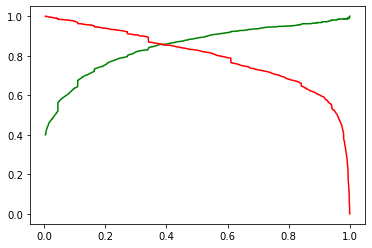

In [158]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Cutoff is 0.39

In [159]:
y_train_prediction_final['final_predicted'] = y_train_prediction_final.Conversion_Prob.map(lambda x: 1 if x > 0.39 else 0)

y_train_prediction_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.429261,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.010788,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.637245,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.076814,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.109646,0,1,1,0,0,0,0,0,0,0,0,0


In [160]:
# Accuracy
accuracy_train= metrics.accuracy_score(y_train_prediction_final.Converted, y_train_prediction_final.final_predicted)

print('Accuracy_Train = ' + str(accuracy_train))

Accuracy_Train = 0.8916794806082351


In [161]:
# confusion matrix again

confusion_1 = metrics.confusion_matrix(y_train_prediction_final.Converted, y_train_prediction_final.final_predicted )
confusion_1

array([[3327,  314],
       [ 320, 1892]], dtype=int64)

In [162]:
# Substituting the value of true positive
TP = confusion_1[1,1]

# Substituting the value of true negatives
TN = confusion_1[0,0]

# Substituting the value of false positives
FP = confusion_1[0,1] 

# Substituting the value of false negatives
FN = confusion_1[1,0]

In [163]:
print('Accuracy_Train = ' + str(accuracy_train))

# Precision 
Precision_Train = TP/(TP+FP)
print('Precision_Train = ' + str(Precision_Train))

#Recall
Recall_Train = TP/(TP+FN)
print('Recall_Train = ' + str(Recall_Train))

Accuracy_Train = 0.8916794806082351
Precision_Train = 0.85766092475068
Recall_Train = 0.8553345388788427


### Test Set

In [164]:
y_test_prediction = res2.predict(X_test_sm)

# Coverting it to df
y_prediction_file1 = pd.DataFrame(y_test_prediction)

# Converting y_test to df
y_test_file1 = pd.DataFrame(y_test)

In [166]:
# Remove and append index for both df 
y_prediction_file1.reset_index(drop=True, inplace=True)
y_test_file1.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_prediction_final = pd.concat([y_test_file1, y_prediction_file1],axis=1)
y_prediction_final.head()

,Converted,0
0,0,0.695921
1,1,0.142042
2,0,0.002694
3,0,0.284254
4,0,0.044952


In [167]:
# Renaming column 

y_prediction_final= y_prediction_final.rename(columns = {0 : 'Conversion_Prob'})
y_prediction_final.head()

,Converted,Conversion_Prob
0,0,0.695921
1,1,0.142042
2,0,0.002694
3,0,0.284254
4,0,0.044952


In [168]:
# using cut off 0.39 for prediction

y_prediction_final['final_predicted'] = y_prediction_final.Conversion_Prob.map(lambda x: 1 if x > 0.39 else 0)
y_prediction_final

,Converted,Conversion_Prob,final_predicted
0,0,0.695921,1
1,1,0.142042,0
2,0,0.002694,0
3,0,0.284254,0
4,0,0.044952,0
...,...,...,...
2504,0,0.126377,0
2505,0,0.203349,0
2506,0,0.004591,0
2507,0,0.017290,0


In [169]:
# Accuracy

accuracy_test = metrics.accuracy_score(y_prediction_final['Converted'], y_prediction_final.final_predicted)
print('Accuracy_Test = ' + str(accuracy_test))

Accuracy_Test = 0.8911917098445595


In [170]:
#confusion matrix 

confusion_2 = metrics.confusion_matrix(y_prediction_final['Converted'], y_prediction_final.final_predicted )
confusion_2

array([[1460,  140],
       [ 133,  776]], dtype=int64)

In [171]:
# Substituting the value of true positive
TP = confusion1[1,1]

# Substituting the value of true negatives
TN = confusion1[0,0]

# Substituting the value of false positives
FP = confusion1[0,1] 

# Substituting the value of false negatives
FN = confusion1[1,0]

In [172]:
print('Accuracy_Test = ' + str(accuracy))

# Precision
Precision_Test =TP/(TP+FP)
print('Precision_Test = ' + str(Precision_Test))

#Recall 
Recall_Test =TP/(TP+FN)

print('Recall_Test = ' + str(Recall_Test))

Accuracy_Test = 0.8423030924312318
Precision_Test = 0.8351063829787234
Recall_Test = 0.8635863586358636


THE TRAINED and TEST (accuracy ,Precision,Recall ) are almost same. Which is Good

### Conclusion : 

That is, there is above 80% chance that our predicted leads will be converted

When compared to the model we derived, our Logistic Regression Model is decent and accurate enough with approx 88% Accuracy on Test Set, 85 % Sensitivity and 90 % Specificity

We can adjust these parameters by changing the cut-off value, and predict leads.

Increasing total visits through advertising, etc. will result in a higher conversion rate

In order to increase conversions, websites should increase engagement with users